# K-Nearest Neighbors

In [1]:
import pandas as pd
import random as rd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

import utils

## Base Line

In [4]:
# Load data
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
X_train, X_test, y_train, y_test = utils.splitTrain(train_input, train_output)

# Create model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train["result"])

# Prediction
y_pred = knn_model.predict(X_test)
# print(knn_model.predict_proba(X_test))

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.9910188314823757

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


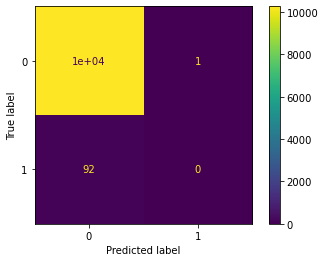

In [5]:
plot_confusion_matrix(knn_model, X_test, y_test)
plt.show()

Once again: overfitting due to unbalanced classes !

## Balanced Classes

### Remove Individuals

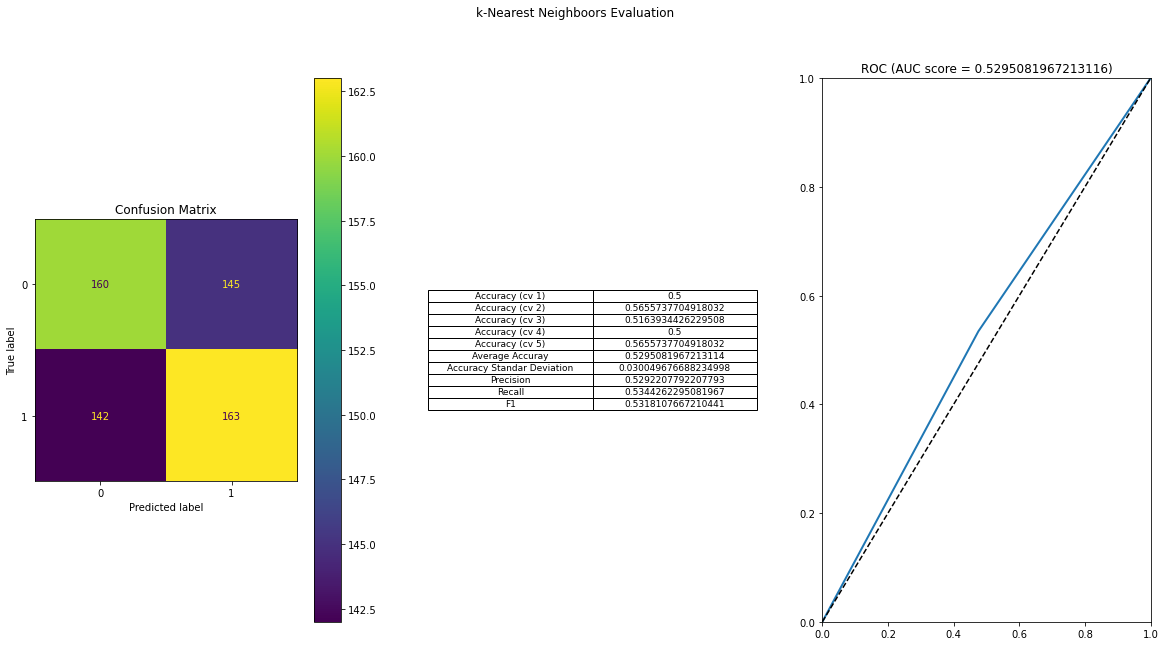

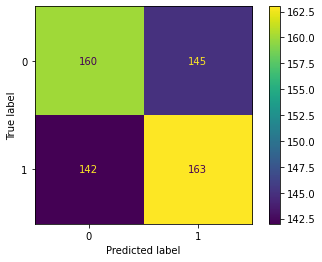

In [2]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByRemoving(train_input, train_output)

# Create model
clf = KNeighborsClassifier(n_neighbors=3)

# Evaluation
utils.modelEvaluation(clf, train_input, train_output["result"], model_name="k-Nearest Neighboors")

### Duplicate Individuals

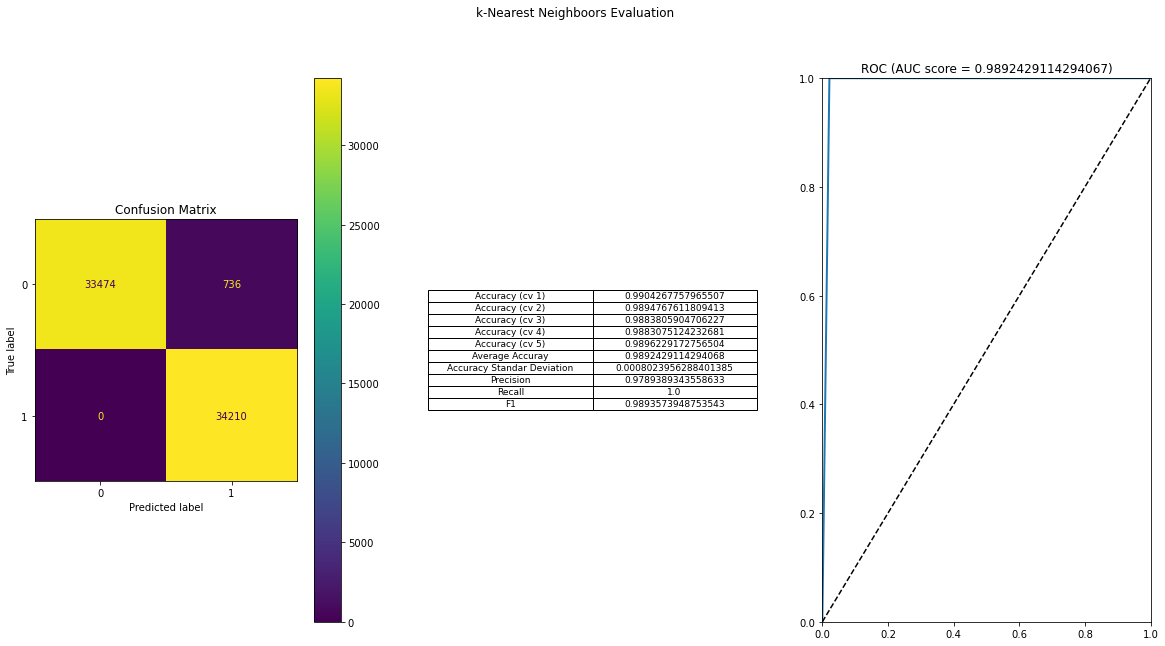

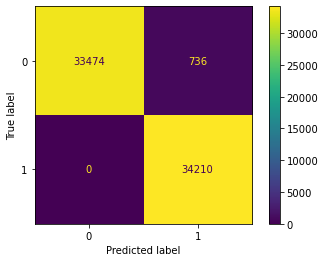

In [7]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByDuplicating(train_input, train_output, modify=False)

# Create model
clf = KNeighborsClassifier(n_neighbors=3)

# Evaluation
utils.modelEvaluation(clf, train_input, train_output["result"], model_name="k-Nearest Neighboors")

### Test

In [6]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByDuplicating(train_input, train_output)
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size = 0.3, random_state = 42)

best_k = 0
best_accuracy = 0

for k in range(1,20):
    # Create model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train["result"])

    # Prediction
    y_pred = knn_model.predict(X_test)

    # Evaluation
    accuracy = metrics.accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(best_k, best_accuracy)

2 0.5573770491803278
